In [9]:
import sqlite3
import pandas as pd

database_path = 'C:\\wildfire\\wildfire_detect\\FPA_FOD_20170508.sqlite'  # Use the correct path

try:
    conn = sqlite3.connect(database_path)
    print("Successfully connected to the database.")

    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("Tables in the database:")
    for table in tables:
        print(table[0])

    table_name = 'Fires'  # Assuming 'Fires' is still the correct table
    query = f"SELECT * FROM {table_name} LIMIT 5"  # Limit to first 5 rows for a quick check
    df = pd.read_sql_query(query, conn)

    print("\nFirst few rows from the Fires table:")
    print(df)

except sqlite3.Error as e:
    print(f"Error connecting to or querying the database: {e}")
except FileNotFoundError:
    print(f"Error: Database file not found at {database_path}")
finally:
    if 'conn' in locals() and conn:
        conn.close()
        print("Database connection closed.")

Successfully connected to the database.
Tables in the database:
spatial_ref_sys
spatialite_history
sqlite_sequence
geometry_columns
spatial_ref_sys_aux
views_geometry_columns
virts_geometry_columns
geometry_columns_statistics
views_geometry_columns_statistics
virts_geometry_columns_statistics
geometry_columns_field_infos
views_geometry_columns_field_infos
virts_geometry_columns_field_infos
geometry_columns_time
geometry_columns_auth
views_geometry_columns_auth
virts_geometry_columns_auth
sql_statements_log
SpatialIndex
ElementaryGeometries
KNN
Fires
idx_Fires_Shape
idx_Fires_Shape_node
idx_Fires_Shape_rowid
idx_Fires_Shape_parent
NWCG_UnitIDActive_20170109

First few rows from the Fires table:
   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import sqlite3
import pandas as pd

database_path = 'C:\\wildfire\\wildfire_detect\\FPA_FOD_20170508.sqlite'  # Ensure correct path

try:
    conn = sqlite3.connect(database_path)
    print("Successfully connected to the database.")

    table_name = 'Fires'
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)

    print("\nFirst few rows from the Fires table (head):")
    print(df.head())
    print("\nInformation about the Fires table (info):")
    print(df.info())

except sqlite3.Error as e:
    print(f"Error connecting to or querying the database: {e}")
except FileNotFoundError:
    print(f"Error: Database file not found at {database_path}")
finally:
    if 'conn' in locals() and conn:
        conn.close()
        print("Database connection closed.")

Successfully connected to the database.

First few rows from the Fires table (head):
   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAM

In [3]:
print(df['FIRE_SIZE_CLASS'].value_counts())
print("\nUnique values in FIRE_SIZE_CLASS:")
print(df['FIRE_SIZE_CLASS'].unique())

FIRE_SIZE_CLASS
B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: count, dtype: int64

Unique values in FIRE_SIZE_CLASS:
['A' 'B' 'G' 'C' 'D' 'F' 'E']


In [4]:
print(df['DISCOVERY_DATE'].dtype)
print(df['DISCOVERY_DATE'].head())

float64
0    2453403.5
1    2453137.5
2    2453156.5
3    2453184.5
4    2453184.5
Name: DISCOVERY_DATE, dtype: float64


In [12]:
def jd_to_datetime(jd):
    return pd.to_datetime(jd - 2440587.5, unit='D', origin='1970-01-01')

df['DISCOVERY_DATE_CONVERTED'] = df['DISCOVERY_DATE'].apply(jd_to_datetime)

print(df[['DISCOVERY_DATE', 'DISCOVERY_DATE_CONVERTED']].head())
print(df['DISCOVERY_DATE_CONVERTED'].dtype)

   DISCOVERY_DATE DISCOVERY_DATE_CONVERTED
0       2453403.5               2005-02-02
1       2453137.5               2004-05-12
2       2453156.5               2004-05-31
3       2453184.5               2004-06-28
4       2453184.5               2004-06-28
datetime64[ns]


In [13]:
df['DISCOVERY_MONTH'] = df['DISCOVERY_DATE_CONVERTED'].dt.month
print(df[['DISCOVERY_DATE_CONVERTED', 'DISCOVERY_MONTH']].head())

  DISCOVERY_DATE_CONVERTED  DISCOVERY_MONTH
0               2005-02-02                2
1               2004-05-12                5
2               2004-05-31                5
3               2004-06-28                6
4               2004-06-28                6


In [14]:
df['DISCOVERY_DAYOFWEEK'] = df['DISCOVERY_DATE_CONVERTED'].dt.dayofweek  # Monday=0, Sunday=6
df['DISCOVERY_DAYOFYEAR'] = df['DISCOVERY_DATE_CONVERTED'].dt.dayofyear
df['DISCOVERY_YEAR'] = df['DISCOVERY_DATE_CONVERTED'].dt.year

print(df[['DISCOVERY_DATE_CONVERTED', 'DISCOVERY_MONTH', 'DISCOVERY_DAYOFWEEK', 'DISCOVERY_DAYOFYEAR', 'DISCOVERY_YEAR']].head())

  DISCOVERY_DATE_CONVERTED  DISCOVERY_MONTH  DISCOVERY_DAYOFWEEK  \
0               2005-02-02                2                    2   
1               2004-05-12                5                    2   
2               2004-05-31                5                    0   
3               2004-06-28                6                    0   
4               2004-06-28                6                    0   

   DISCOVERY_DAYOFYEAR  DISCOVERY_YEAR  
0                   33            2005  
1                  133            2004  
2                  152            2004  
3                  180            2004  
4                  180            2004  


In [15]:
print(df['DISCOVERY_TIME'].head())
print(df['DISCOVERY_TIME'].dtype)

0    1300
1    0845
2    1921
3    1600
4    1600
Name: DISCOVERY_TIME, dtype: object
object


In [17]:
import numpy as np

def time_to_hours(time_str):
    if pd.isna(time_str):
        return np.nan
    try:
        time_str = str(int(time_str)).zfill(4)  # Ensure 4 digits
        hours = int(time_str[:2])
        minutes = int(time_str[2:])
        return hours + minutes / 60.0
    except ValueError:
        return np.nan

df['DISCOVERY_HOUR'] = df['DISCOVERY_TIME'].apply(time_to_hours)
print(df[['DISCOVERY_TIME', 'DISCOVERY_HOUR']].head())
print(df['DISCOVERY_HOUR'].dtype)

  DISCOVERY_TIME  DISCOVERY_HOUR
0           1300           13.00
1           0845            8.75
2           1921           19.35
3           1600           16.00
4           1600           16.00
float64


In [18]:
print(df[['LATITUDE', 'LONGITUDE']].head())
print(df[['LATITUDE', 'LONGITUDE']].describe())
print(df[['LATITUDE', 'LONGITUDE']].isnull().sum())

    LATITUDE   LONGITUDE
0  40.036944 -121.005833
1  38.933056 -120.404444
2  38.984167 -120.735556
3  38.559167 -119.913333
4  38.559167 -119.933056
           LATITUDE     LONGITUDE
count  1.880465e+06  1.880465e+06
mean   3.678121e+01 -9.570494e+01
std    6.139031e+00  1.671694e+01
min    1.793972e+01 -1.788026e+02
25%    3.281860e+01 -1.103635e+02
50%    3.545250e+01 -9.204304e+01
75%    4.082720e+01 -8.229760e+01
max    7.033060e+01 -6.525694e+01
LATITUDE     0
LONGITUDE    0
dtype: int64


In [19]:
print(df['FIRE_SIZE_CLASS'].value_counts(normalize=True).sort_index())

FIRE_SIZE_CLASS
A    0.354656
B    0.499545
C    0.117033
D    0.015117
E    0.007502
F    0.004140
G    0.002006
Name: proportion, dtype: float64


In [20]:
print(df.describe())

           OBJECTID        FOD_ID     FIRE_YEAR  DISCOVERY_DATE  \
count  1.880465e+06  1.880465e+06  1.880465e+06    1.880465e+06   
mean   9.402330e+05  5.484020e+07  2.003710e+03    2.453064e+06   
min    1.000000e+00  1.000000e+00  1.992000e+03    2.448622e+06   
25%    4.701170e+05  5.055000e+05  1.998000e+03    2.451084e+06   
50%    9.402330e+05  1.067761e+06  2.004000e+03    2.453178e+06   
75%    1.410349e+06  1.910639e+07  2.009000e+03    2.455036e+06   
max    1.880465e+06  3.003484e+08  2.015000e+03    2.457388e+06   
std    5.428436e+05  1.011963e+08  6.663099e+00    2.434573e+03   

       DISCOVERY_DOY  STAT_CAUSE_CODE     CONT_DATE       CONT_DOY  \
count   1.880465e+06     1.880465e+06  9.889340e+05  988934.000000   
mean    1.647191e+02     5.979037e+00  2.453238e+06     172.656766   
min     1.000000e+00     1.000000e+00  2.448622e+06       1.000000   
25%     8.900000e+01     3.000000e+00  2.450701e+06     102.000000   
50%     1.640000e+02     5.000000e+00  2.45346

In [23]:
import numpy as np
import pandas as pd

# Set a sample size for the original fire data (e.g., 1% of the original)
sample_fraction = 0.01
df_sample_fire = df.sample(frac=sample_fraction, random_state=42).copy()

# Number of fire samples in the reduced set
num_fire_sample = len(df_sample_fire)

# Initialize an empty list to store synthetic no-fire data
no_fire_data_sample = []

# Generate synthetic no-fire samples equal to the size of the fire sample
for _ in range(num_fire_sample):
    latitude = np.random.uniform(df_sample_fire['LATITUDE'].min(), df_sample_fire['LATITUDE'].max())
    longitude = np.random.uniform(df_sample_fire['LONGITUDE'].min(), df_sample_fire['LONGITUDE'].max())
    month = np.random.randint(1, 13)
    dayofweek = np.random.randint(0, 7)
    dayofyear = np.random.randint(1, 367)
    year = np.random.randint(df_sample_fire['DISCOVERY_YEAR'].min(), df_sample_fire['DISCOVERY_YEAR'].max() + 1)
    hour = np.random.uniform(0, 24)
    fire_occurred = 0  # Label as no fire

    no_fire_data_sample.append([latitude, longitude, month, dayofweek, dayofyear, year, hour, fire_occurred])

# Create a DataFrame from the synthetic data
df_no_fire_sample = pd.DataFrame(no_fire_data_sample, columns=['LATITUDE', 'LONGITUDE', 'DISCOVERY_MONTH', 'DISCOVERY_DAYOFWEEK', 'DISCOVERY_DAYOFYEAR', 'DISCOVERY_YEAR', 'DISCOVERY_HOUR', 'Fire_Occurred'])

# Add the 'Fire_Occurred' column to the sampled fire data
df_sample_fire['Fire_Occurred'] = 1

# Concatenate the sampled fire and synthetic no-fire DataFrames
df_balanced_sample = pd.concat([df_sample_fire[['LATITUDE', 'LONGITUDE', 'DISCOVERY_MONTH', 'DISCOVERY_DAYOFWEEK', 'DISCOVERY_DAYOFYEAR', 'DISCOVERY_YEAR', 'DISCOVERY_HOUR', 'Fire_Occurred']], df_no_fire_sample], ignore_index=True)

# Shuffle the combined DataFrame
df_balanced_sample = df_balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced_sample['Fire_Occurred'].value_counts())
print(df_balanced_sample.head())
print(f"\nShape of the balanced sample DataFrame: {df_balanced_sample.shape}")

Fire_Occurred
1    18805
0    18805
Name: count, dtype: int64
    LATITUDE   LONGITUDE  DISCOVERY_MONTH  DISCOVERY_DAYOFWEEK  \
0  30.193750  -94.735410               11                    6   
1  43.572998 -129.881881                6                    3   
2  44.194731 -141.921666                3                    1   
3  35.555000  -79.331700                4                    1   
4  33.968742 -116.496225                6                    4   

   DISCOVERY_DAYOFYEAR  DISCOVERY_YEAR  DISCOVERY_HOUR  Fire_Occurred  
0                  329            2001             NaN              1  
1                  351            2013       12.898898              0  
2                  210            2011        9.406582              0  
3                  104            1998             NaN              1  
4                  168            2005       11.983333              1  

Shape of the balanced sample DataFrame: (37610, 8)


In [24]:
print(df_balanced_sample[['LATITUDE', 'LONGITUDE', 'DISCOVERY_MONTH', 'DISCOVERY_DAYOFWEEK', 'DISCOVERY_DAYOFYEAR', 'DISCOVERY_YEAR', 'DISCOVERY_HOUR']].isnull().sum())

LATITUDE                  0
LONGITUDE                 0
DISCOVERY_MONTH           0
DISCOVERY_DAYOFWEEK       0
DISCOVERY_DAYOFYEAR       0
DISCOVERY_YEAR            0
DISCOVERY_HOUR         8939
dtype: int64


In [26]:
median_discovery_hour = df_balanced_sample['DISCOVERY_HOUR'].median()
df_balanced_sample['DISCOVERY_HOUR'] = df_balanced_sample['DISCOVERY_HOUR'].fillna(median_discovery_hour)

# Verify that missing values are handled
print(df_balanced_sample['DISCOVERY_HOUR'].isnull().sum())

0


In [27]:
from sklearn.model_selection import train_test_split

# Define our features (X) and target (y)
X = df_balanced_sample[['LATITUDE', 'LONGITUDE', 'DISCOVERY_MONTH', 'DISCOVERY_DAYOFWEEK', 'DISCOVERY_DAYOFYEAR', 'DISCOVERY_YEAR', 'DISCOVERY_HOUR']]
y = df_balanced_sample['Fire_Occurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Print the distribution of the target variable in the training and testing sets
print(f"\nDistribution of target in training set:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribution of target in testing set:\n{y_test.value_counts(normalize=True)}")

Shape of X_train: (30088, 7)
Shape of X_test: (7522, 7)
Shape of y_train: (30088,)
Shape of y_test: (7522,)

Distribution of target in training set:
Fire_Occurred
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribution of target in testing set:
Fire_Occurred
1    0.5
0    0.5
Name: proportion, dtype: float64


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--- Model Evaluation ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

--- Model Evaluation ---
Accuracy:  0.9747
Precision: 0.9702
Recall:    0.9795
F1-Score:  0.9749


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Random Forest model retrained successfully!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Model Evaluation (Retrained) ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

Random Forest model retrained successfully!

--- Model Evaluation (Retrained) ---
Accuracy:  0.9747
Precision: 0.9702
Recall:    0.9795
F1-Score:  0.9749


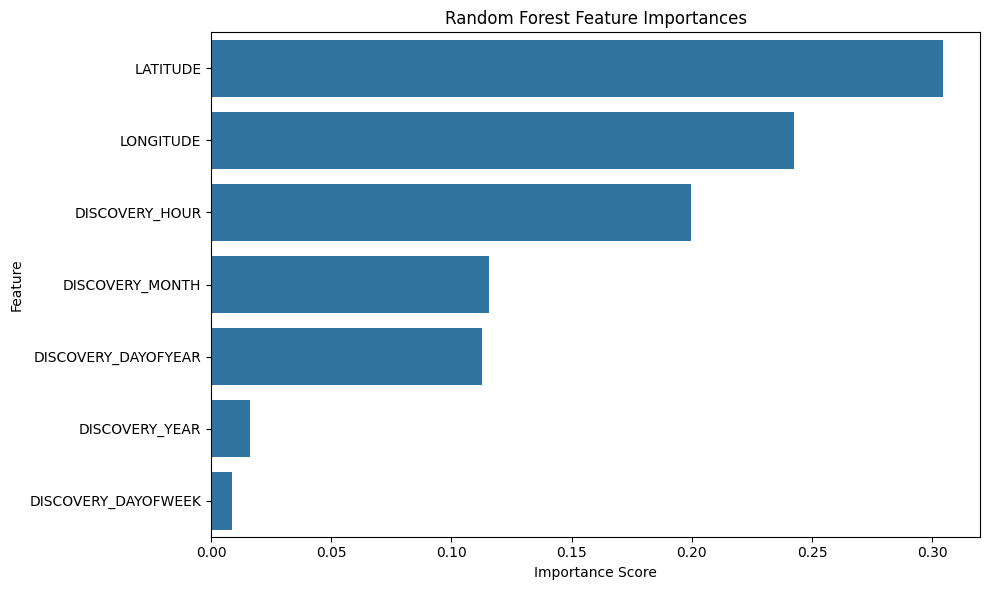


--- Feature Importances ---
               Feature  Importance
0             LATITUDE    0.304692
1            LONGITUDE    0.242551
6       DISCOVERY_HOUR    0.199587
2      DISCOVERY_MONTH    0.115607
4  DISCOVERY_DAYOFYEAR    0.112689
5       DISCOVERY_YEAR    0.016065
3  DISCOVERY_DAYOFWEEK    0.008809


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Feature Importances ---")
print(importance_df)

In [33]:
import joblib

# Assuming 'model' is your trained RandomForestClassifier object
joblib.dump(model, 'fire_prediction_model.joblib')
print("Trained model saved as fire_prediction_model.joblib")

Trained model saved as fire_prediction_model.joblib


In [ ]:
#http://127.0.0.1:5000/predict_risk_coords?lat=35.1258&lon=-117.985